# Plot Spectrogram Output from LabChart
The following script will plot your data from LabChart.

First, we'll import necessary toolboxes & our saved .csv file.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

filename = 'eeg_2.csv'

labchart_output = np.genfromtxt(filename, delimiter=',')

np.set_printoptions(precision=2)

print(labchart_output)

[[        nan 0.00000e+00 3.90625e-01 ... 1.99219e+02 1.99609e+02
  2.00000e+02]
 [4.49600e+01 3.42000e-12 2.75000e-11 ... 1.88000e-20 5.59000e-21
  1.44000e-20]
 [4.51200e+01 2.35000e-12 2.33000e-11 ... 1.01000e-20 9.13000e-21
  1.06000e-20]
 ...
 [4.76800e+01 1.24000e-12 1.26000e-11 ... 6.36000e-21 5.59000e-21
  2.35000e-21]
 [4.78400e+01 2.78000e-15 2.89000e-11 ... 6.36000e-21 5.53000e-21
  1.78000e-20]
 [4.80000e+01 2.28000e-12 5.09000e-11 ... 2.19000e-20 1.12000e-20
  1.99000e-20]]


You'll notice that we need to clean up the data a little bit, since the frequency labels (in the 0th row) are also in here, along with the time labels in the first column. Let's save these frequency & time labels, and then only save the necessary rows of our dataset. We should be left with an array that is just the actual data.

In [71]:
frequency = labchart_output[0,1:]
time = labchart_output[:,1]
spectrum = labchart_output[1:,1:]

Next, let's rotate the data so that it matches our conventional spectrogram format. We'll also subselect the frequencies we want, rather than plotting up to 200 Hz.

In [144]:
# set your max frequency below
max_frequency = 20

# round our frequency values so we can find one that matches our max frequency
freq_rounded = np.round(frequency)
freq_IDs = np.where(freq_rounded == max_frequency)

# create a new frequency axis
freq_short = freq_rounded[0:freq_IDs[0][0]]

# cut down the spectrum to only our desired frequencies
spectrum_clean = spectrum[:,0:freq_short.shape[0]]

# rotate the spectrum to match typical spectrogram format
spectrum_rotated = np.rot90(spectrum_clean)
freq_labels = np.flip(freq_short,axis=0)

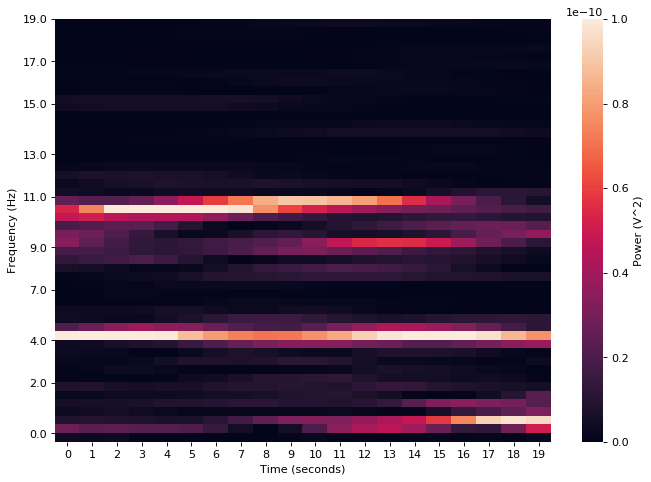

In [147]:
num_ticks = 10
yticks = np.linspace(0, len(freq_labels) - 1, num_ticks, dtype=np.int)
yticklabels = [freq_labels[idx] for idx in yticks]

max_v = 1e-10

fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.heatmap(spectrum_rotated,vmin=0,vmax=max_v,yticklabels=yticklabels,cbar_kws={'label': 'Power (V^2)'})

ax.set_yticks(yticks)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Time (seconds)')

plt.show()